In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from collections import Counter
import keras
import pickle
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout, Conv2D, MaxPooling1D, TimeDistributed, LeakyReLU, SeparableConv2D
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

from sklearn.preprocessing import Normalizer

df = pd.read_csv('//datc//opschaler//combined_gas_smart_weather_dfs//processed/all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df = df.dropna()


def getdata():
    "Getting saved features and labels"
    with open('features', 'rb') as fp:
        X=pickle.load(fp)

    with open('labels', 'rb') as fp:
        y=pickle.load(fp)
    return X,y

X,y=getdata()

X=sc.fit_transform(X)

X=Normalizer().fit_transform(X)

X=np.expand_dims(X,axis=2)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)


In [51]:
input = Input(shape=(14,1))

cnn=Conv1D(128,3,activation='relu')(input)
maxp=MaxPooling1D()(cnn)

flat=Flatten()(maxp)

d=Dense(128, activation='relu')(flat)
d=Dropout(0.4)(d)

d=Dense(256, activation='relu')(d)
d=Dropout(0.4)(d)

d=Dense(512, activation='relu')(d)
d=Dropout(0.4)(d)

d=Dense(1024, activation='relu')(d)
d=Dropout(0.4)(d)

d=Dense(2048, activation='relu')(d)

output = Dense(1, activation='linear')(d)

model = Model(inputs=input, outputs=output)

adam=Adam(lr=0.0001)

model.compile(optimizer=adam, loss='mse')

model.fit(X_train,y_train,batch_size=32, epochs=10,validation_data=(X_test,y_test))

model.save('cnn')

Train on 94894 samples, validate on 10544 samples
Epoch 1/10
94894/94894 [==============================] - 32s - loss: 0.8557 - val_loss: 0.8242
Epoch 2/10
94894/94894 [==============================] - 32s - loss: 0.8055 - val_loss: 0.8037
Epoch 3/10
94894/94894 [==============================] - 32s - loss: 0.7894 - val_loss: 0.8013
Epoch 4/10
94894/94894 [==============================] - 32s - loss: 0.7804 - val_loss: 0.7802
Epoch 5/10
94894/94894 [==============================] - 32s - loss: 0.7745 - val_loss: 0.7817
Epoch 6/10
94894/94894 [==============================] - 32s - loss: 0.7709 - val_loss: 0.7742
Epoch 7/10
94894/94894 [==============================] - 32s - loss: 0.7670 - val_loss: 0.7687
Epoch 8/10
94894/94894 [==============================] - 32s - loss: 0.7619 - val_loss: 0.7669
Epoch 9/10
94894/94894 [==============================] - 31s - loss: 0.7583 - val_loss: 0.7566
Epoch 10/10
94894/94894 [==============================] - 32s - loss: 0.7585 - val_lo

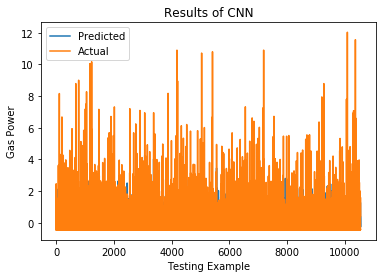

In [52]:
from keras.models import load_model
model=load_model('cnn')

preds=model.predict(X_test)

import matplotlib.pyplot as plt

x=np.arange(len(preds))

plt.plot(x,preds)
plt.plot(x, y_test)

plt.xlabel('Testing Example')
plt.ylabel('Gas Power')

plt.legend(("Predicted", "Actual"), loc='best')

plt.title("Results of CNN")
plt.show()

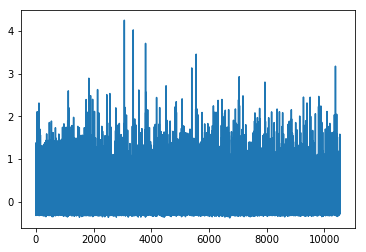

In [53]:
plt.plot(x,preds)

Text(0, 0.5, 'Gas Power')

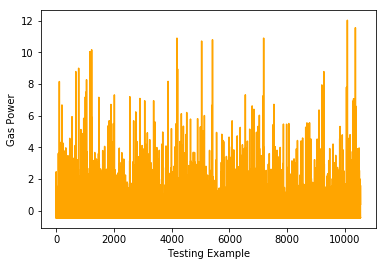

In [54]:
plt.plot(x, y_test, color = 'orange')
plt.xlabel('Testing Example')
plt.ylabel('Gas Power')